In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
train_df = pd.read_csv(r"C:\Users\Ganesh P\Desktop\JUPYTER LAB\Titanic\train.csv")

In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [6]:
train_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Dooley, Mr. Patrick",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#numerical_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
#categorical_cols = train_df.select_dtypes(include=["object"]).columns.tolist()
#train_df["Survived"].value_counts()

### Creating a function to print categorical_variables

In [9]:
# Happiest Girl in the World by Stephen Dawns
def cat_plot(column):
    df_column = train_df[column]
    values = df_column.value_counts() 
    plt.figure(figsize=(10,8))
    plt.bar(values.index, values.values, edgecolor='white')
    plt.xticks(values.index)
    plt.ylabel("Frequency")
    plt.title(f"distribution of {column}")
    plt.show()

    print(f"{column} : \n{values}")
    # your way's better by Forrest Frank

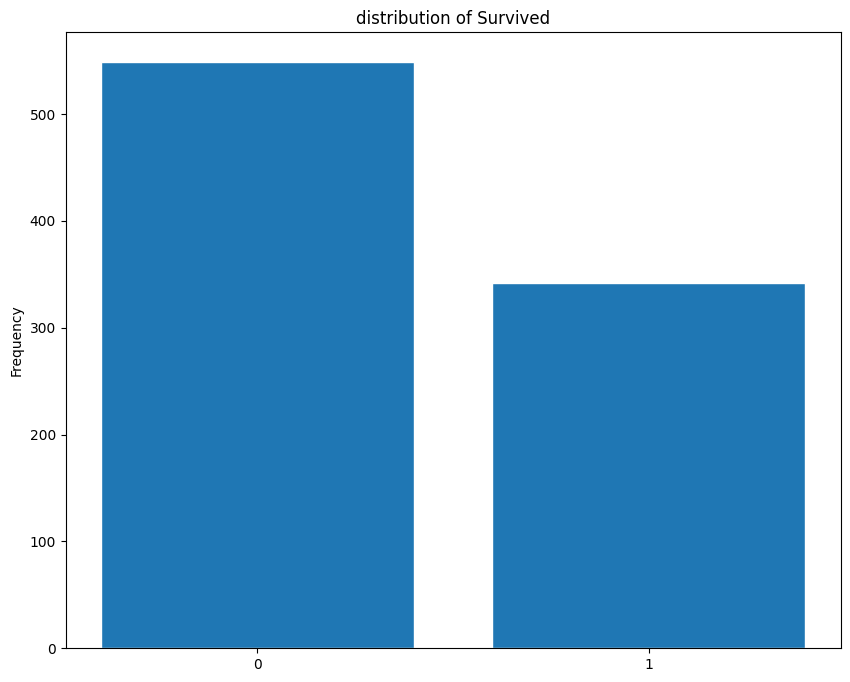

Survived : 
Survived
0    549
1    342
Name: count, dtype: int64


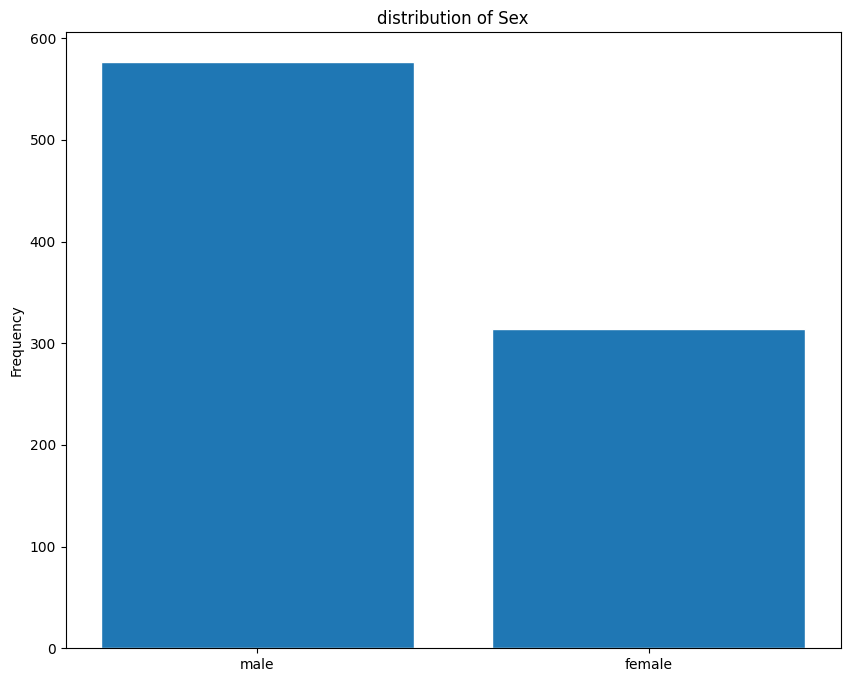

Sex : 
Sex
male      577
female    314
Name: count, dtype: int64


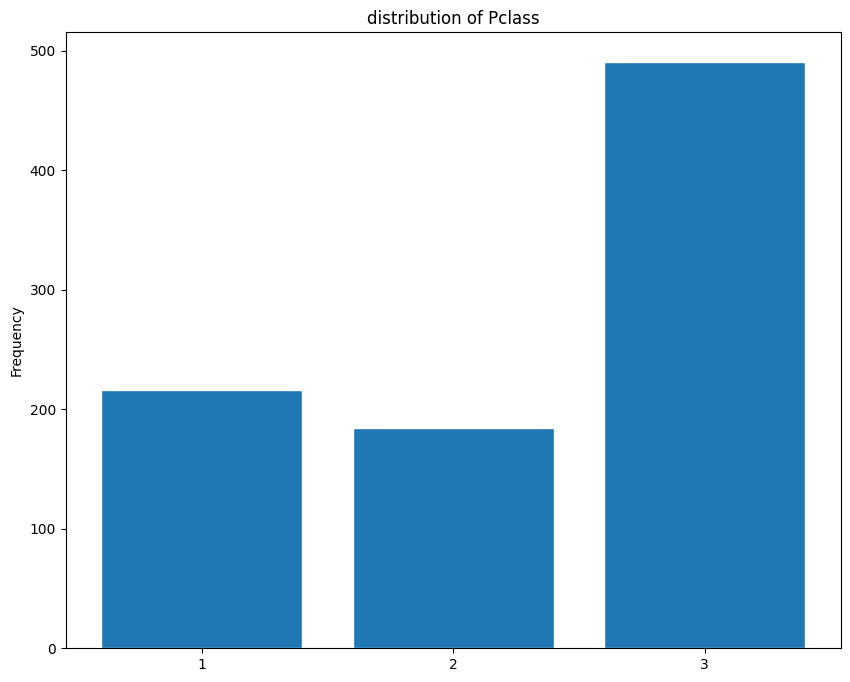

Pclass : 
Pclass
3    491
1    216
2    184
Name: count, dtype: int64


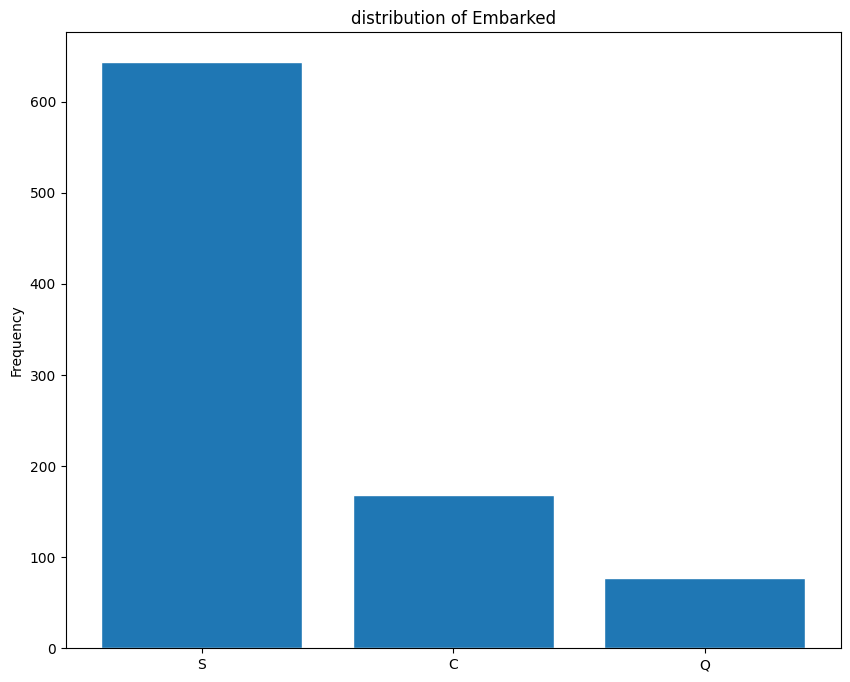

Embarked : 
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


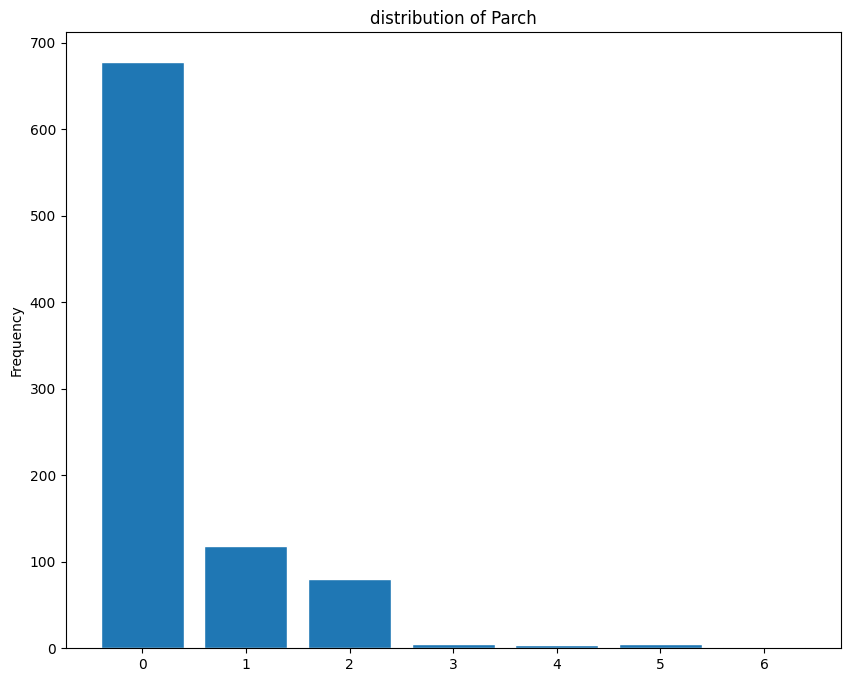

Parch : 
Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [10]:
cat_cols = ["Survived", "Sex", "Pclass", "Embarked", "Parch"]

for cat in cat_cols:
    cat_plot(cat)

### There are some categorical columns that have too many categories

In [11]:
## Devil in disguise by Marino
cat_cols_2 = ["Cabin", "Name", "Ticket"]
for cat in cat_cols_2:
    print(f"{cat} \n{train_df[cat].value_counts()}\n\n\n")

Cabin 
Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64



Name 
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64



Ticket 
Ticket
347082              7
1601                7
CA. 2343           

### These are called High_carfinality categorical features

In [12]:
# Sunroof by nicky youre
# Feel it by D4VD
def num_plot(column):
    df_column = train_df[column]
    plt.figure(figsize=(10,8))
    plt.hist(df_column, bins=50)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.title(f"{column} Distribution (Histogram)")
    plt.show()
# All the stars by kendrik lamar, SZA  

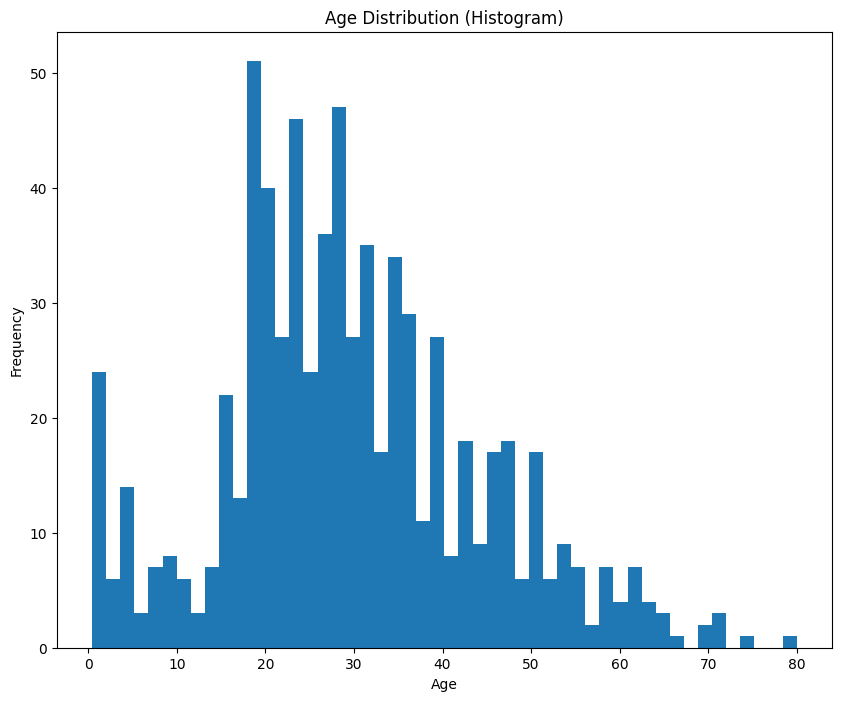

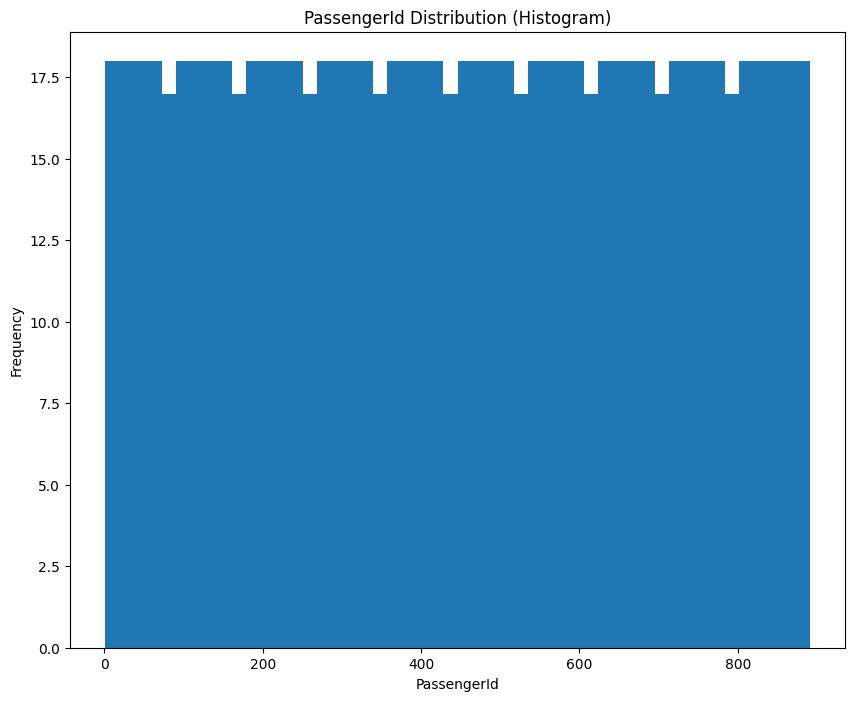

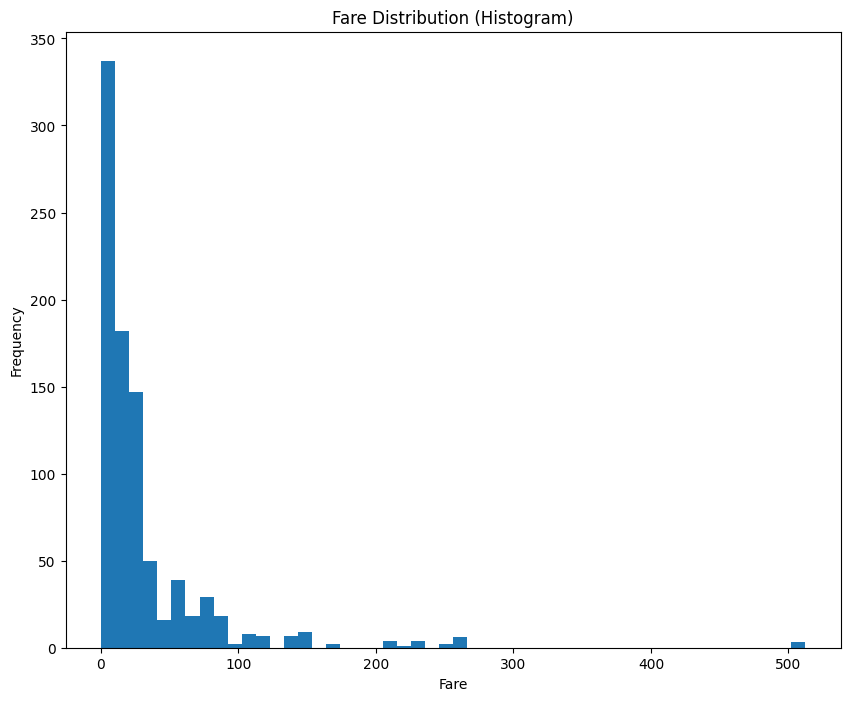

In [13]:
num_cat = ["Age", "PassengerId", "Fare"]
for cat in num_cat:
    num_plot(cat)

### Let's do some basic Data Analysis 

#### Pclass represnets

#### 1 = 1st class → Upper class (wealthy passengers)

#### 2 = 2nd class → Middle class

#### 3 = 3rd class → Lower class (working class, often emigrants)

#### P-class vs Survived Class

In [14]:
train_df[["Pclass","Survived"]].groupby(["Pclass"],
        as_index=False).mean().sort_values(by="Survived", ascending=False)
# Honey pie by JAWNY

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363



Pclass   Survived  
1        &nbsp;&nbsp;&nbsp;&nbsp;0.629630   &nbsp;&nbsp;→ About 63% of 1st-class passengers survived  
2        &nbsp;&nbsp;&nbsp;&nbsp;0.472826   &nbsp;&nbsp;→ About 47% of 2nd-class passengers survived  
3        &nbsp;&nbsp;&nbsp;&nbsp;0.242363   &nbsp;&nbsp;→ About 24% of 3rd-class passengers survived  



### Sex vs Survived

In [15]:
train_df[["Sex","Survived"]].groupby(["Sex"],as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


Female &nbsp;&nbsp;&nbsp;&nbsp;→&nbsp;&nbsp; &nbsp;&nbsp;0.742038 &nbsp;&nbsp;(~74%) &nbsp;&nbsp;survived

Male &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;→&nbsp;&nbsp; &nbsp;&nbsp;0.188908&nbsp;&nbsp; (~19%) &nbsp;&nbsp;survived

### SibSp vs Survived

#### SibSp -> Siblings and Spouse together 

In [16]:
train_df[["SibSp","Survived"]].groupby(["SibSp"], as_index = False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


SibSp&nbsp;&nbsp;&nbsp;&nbsp;  Survived  
0&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       0.345395   → Alone, ~34.5% survived  
1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       0.535885   → With 1 sibling/spouse, ~53.6% survived  
2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       0.464286   → With 2, ~46.4% survived  
3&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       0.250000   → With 3, ~25% survived  
4&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       0.166667   → With 4, ~17% survived  
5&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       0.000000   → With 5, nobody survived  
8&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       0.000000   → With 8, nobody survived  


### Parch vs Survived

#### Parch -> Number of parents or children aboard the Titanic with the passenger

In [17]:
train_df[["Parch","Survived"]].groupby(["Parch"], as_index = False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


Parch &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;   Survived  
0&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       0.343658   → No parents/children, ~34% survived  
1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       0.550847   → With 1 parent/child, ~55% survived  
2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;      0.500000   → With 2, ~50% survived  
3&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       0.600000   → With 3, ~60% survived  
4&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       0.000000   → With 4, 0% survived  
5&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       0.200000   → With 5, ~20% survived  
6&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;       0.000000   → With 6, 0% survived  


### Outlier Detection

In [18]:
def outlier_detection(df, features):
    outliers_indices = []

    for cat in features:
        Q1 = np.percentile(df[cat], 25)
        Q3 = np.percentile(df[cat], 75)
        IQR = Q3 - Q1
        outlier_step = IQR*1.5
        outlier_list_col = df[(df[cat] < Q1 - outlier_step) | (df[cat] > Q3 + outlier_step)].index
        outliers_indices.extend(outlier_list_col)
    outliers_indices = Counter(outliers_indices)
    multiple_outliers = [i for i, v in outliers_indices.items() if v>2]
    return multiple_outliers

In [19]:
train_df.loc[outlier_detection(train_df, ["Age","SibSp","Parch","Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [20]:
train_df = train_df.drop(outlier_detection(train_df,["Age","SibSp","Parch","Fare"]), axis=0).reset_index(drop=True)

### Managing missed values

In [21]:
train_df_len = len(train_df)

In [22]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [23]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [24]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


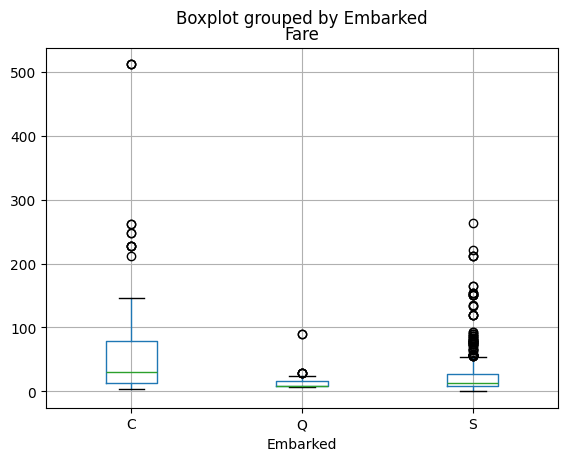

In [25]:
train_df.boxplot(column="Fare", by="Embarked")
plt.show()

In [26]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Vizualization

#### Correlation Between SibSp — Parch — Age — Fare — Survived

<Axes: >

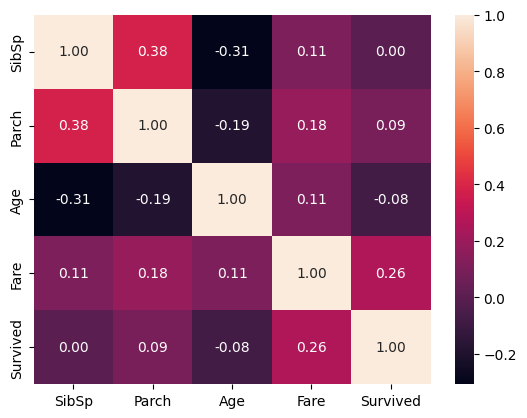

In [27]:
cat_1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[cat_1].corr(), annot=True, fmt=".2f")

### Lets see relation of SibSp, Parch, Pclass with Survival
### This gives us details for further feature Engineering and dropping out  unnecessary column

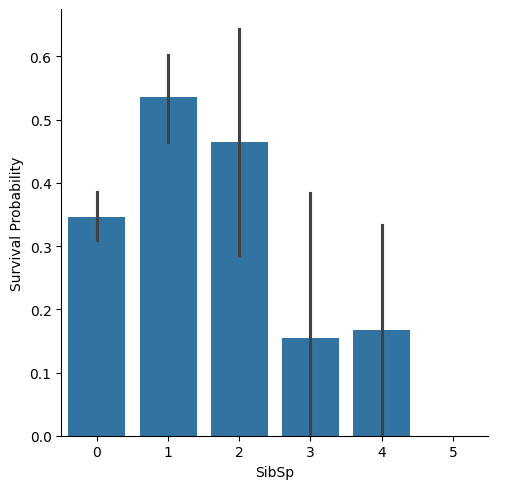

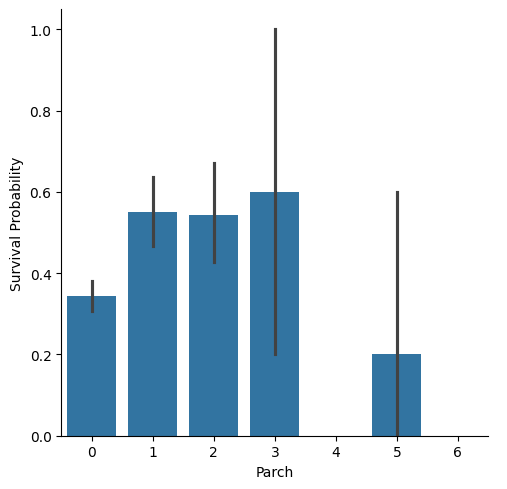

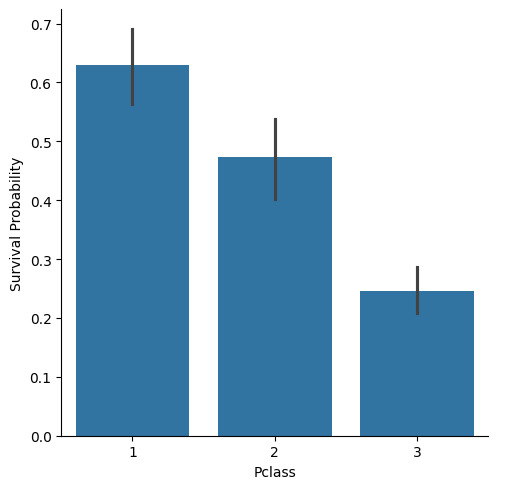

In [28]:
def draw_catplot(X_cat,y_cat):
    g = sns.catplot(x=X_cat, y=y_cat,data=train_df,kind="bar")
    g.set_ylabels("Survival Probability")
    plt.show()
cat_2 = ["SibSp", "Parch", "Pclass"]
for cat in cat_2:
    draw_catplot(cat,"Survived")

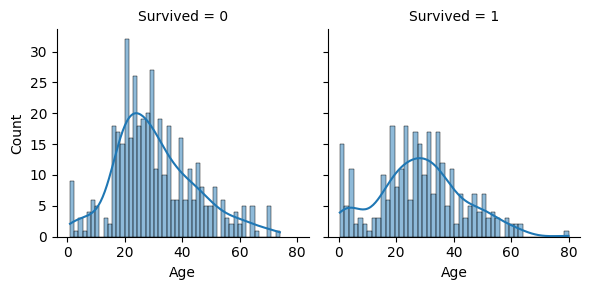

In [29]:
g = sns.FacetGrid(train_df, col="Survived")
g.map(sns.histplot,"Age", bins=50, kde=True)

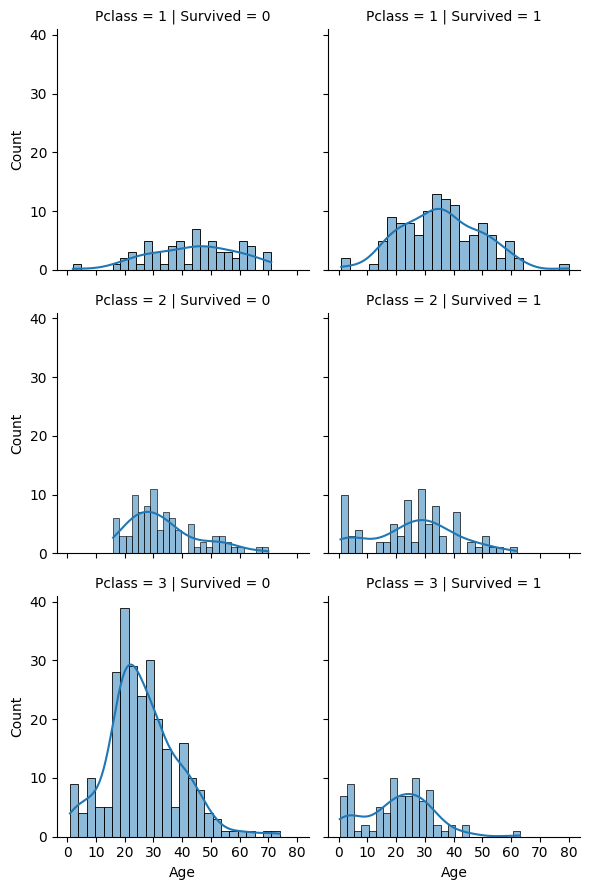

In [30]:
g = sns.FacetGrid(train_df, col="Survived", row="Pclass")
g.map(sns.histplot, "Age", bins=25, kde=True)
for ax in g.axes.flat:
    ax.set_xticks(range(0,81,10))
    ax.set_xlabel("Age")
plt.show()

### lets see relation between Embarked, Sex, Pclass, Survived

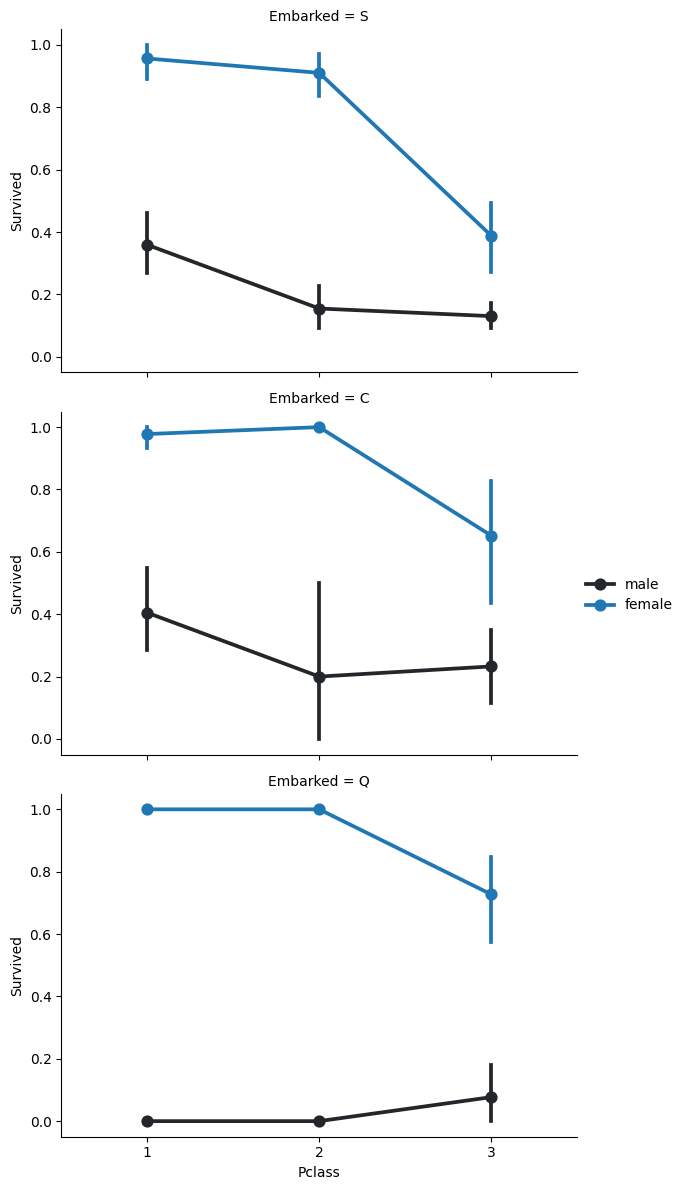

In [31]:
g = sns.FacetGrid(train_df, row="Embarked", height=4, aspect=1.5)
g.map_dataframe(sns.pointplot, x="Pclass", y="Survived", hue="Sex", order=[1,2,3], hue_order=["male","female"],palette='dark:#1f77b4')
g.add_legend()
plt.show()

### lets see relation between Embarked, Sex, Fare, Survived

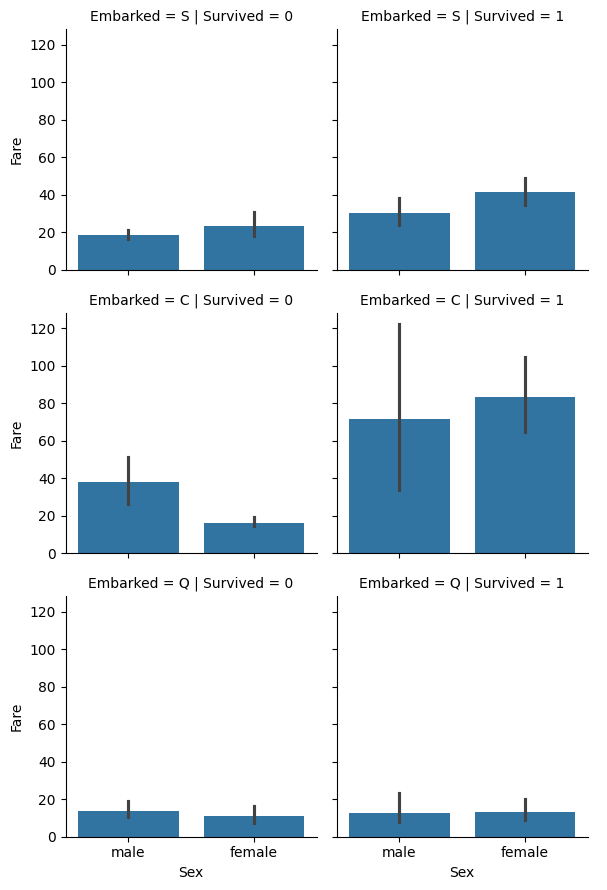

In [32]:
g = sns.FacetGrid(train_df, row="Embarked", col="Survived")
g.map(sns.barplot, "Sex", "Fare",order=["male","female"])
g.add_legend()
plt.show()

### High pay -> High survival Chance

### Lets fill missing values for age

In [33]:
int(train_df["Age"].isnull().sum())

170

In [34]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
27,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
840,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,NaN,1,0,17453,89.1042,C92,C
850,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
858,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
868,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [35]:
corr_matrix = train_df.corr(numeric_only=True)
corr_matrix["Age"].sort_values(ascending=True)

Pclass        -0.374495
SibSp         -0.307129
Parch         -0.186457
Survived      -0.076867
PassengerId    0.034172
Fare           0.110219
Age            1.000000
Name: Age, dtype: float64

### Age is strongly correlated with Pclass, SibSp, and Parch.

#### Lets find age. Instead of using Simple IMputer, lets use Sibsp, Parch and Pclass to get a good value for Age

In [36]:
indexes = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in indexes:
    age_pred = train_df["Age"][
    (train_df["SibSp"] == train_df.iloc[i]["SibSp"])&
    (train_df["Parch"] == train_df.iloc[i]["Parch"])&
    (train_df["Pclass"] == train_df.iloc[i]["Pclass"])
    ].median()
    age_med = train_df["Age"].median()
    if not np.isnan(age_pred):
        train_df.iloc[i,train_df.columns.get_loc("Age")] = age_pred
    else:
        train_df.iloc[i,train_df.columns.get_loc("Age")] = age_med

In [37]:
train_df["Age"].isnull().sum()

np.int64(0)

In [38]:
train_df["Name"].head(25)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [39]:
name = train_df["Name"]

In [40]:
train_df["Title"] = train_df["Name"].str.extract(r',\s*([\w\s]+)\.',expand=False).str.strip()

In [41]:
train_df["Title"].value_counts()

Title
Mr              513
Miss            177
Mrs             125
Master           39
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Don'),
  Text(5, 0, 'Rev'),
  Text(6, 0, 'Dr'),
  Text(7, 0, 'Mme'),
  Text(8, 0, 'Ms'),
  Text(9, 0, 'Major'),
  Text(10, 0, 'Lady'),
  Text(11, 0, 'Sir'),
  Text(12, 0, 'Mlle'),
  Text(13, 0, 'Col'),
  Text(14, 0, 'Capt'),
  Text(15, 0, 'the Countess'),
  Text(16, 0, 'Jonkheer')])

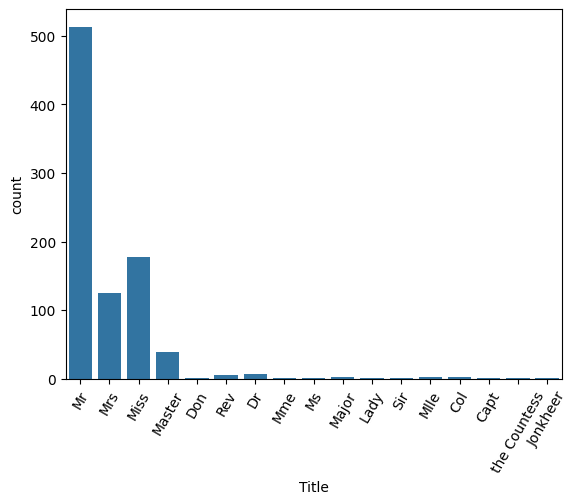

In [42]:
sns.countplot(x="Title", data=train_df)
plt.xticks(rotation=60)

In [43]:
rare_titles = (train_df["Title"].value_counts()[train_df["Title"].value_counts() <= 7]).index
rare_titles = rare_titles.tolist()
rare_titles =[title for title in rare_titles if title not in ["Mlle", "Ms"]]

In [44]:
train_df["Title"] = train_df["Title"].replace(rare_titles, "other")
train_df["Title"].str.contains("other").sum()

np.int64(24)

In [45]:
train_df["Title"] = [
    0 if i == "Master"
    else 1 if i in ["Miss", "Ms", "Mlle", "Mrs"]
    else 2 if i == "Mr"
    else 3
    for i in train_df["Title"]
]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

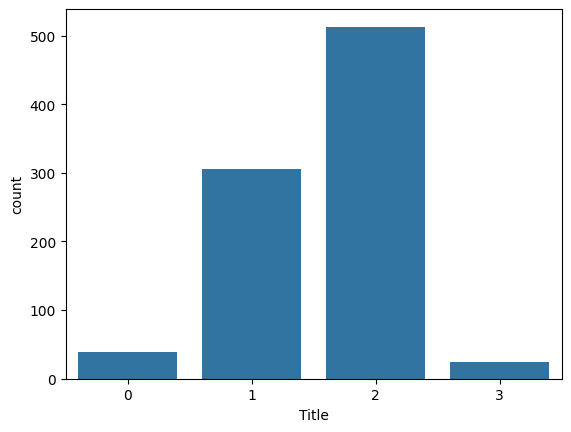

In [46]:
sns.countplot(x="Title", data=train_df)
plt.show()

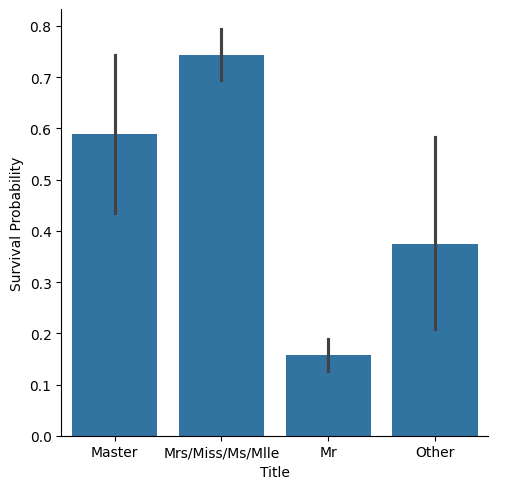

In [47]:
g = sns.catplot(x="Title", y="Survived", data=train_df, kind="bar")
g.set_xticklabels(["Master", "Mrs/Miss/Ms/Mlle", "Mr", "Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [48]:
train_df.drop(labels=["Name"], axis=1, inplace=True)

In [49]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,3
877,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,1
878,889,0,3,female,13.5,1,2,W./C. 6607,23.4500,NaN,S,1
879,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,2


In [50]:
train_df = pd.get_dummies(train_df, columns=["Title"], dtype = int)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0


In [51]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1

In [52]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,1,0,0,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,1,0,0,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S,0,0,0,1,1
877,888,1,1,female,19.0,0,0,112053,30.0000,B42,S,0,1,0,0,1
878,889,0,3,female,13.5,1,2,W./C. 6607,23.4500,NaN,S,0,1,0,0,4
879,890,1,1,male,26.0,0,0,111369,30.0000,C148,C,0,0,1,0,1


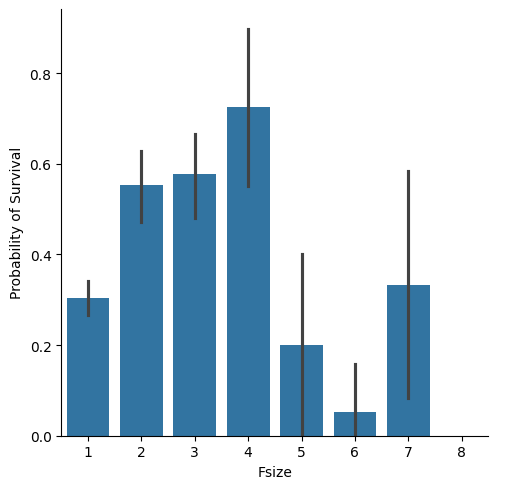

In [53]:
g = sns.catplot(x="Fsize", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Probability of Survival")
plt.show()

In [54]:
train_df["family_size"] = [1 if i<5 else 0 for i in train_df["Fsize"]]

<function matplotlib.pyplot.show(close=None, block=None)>

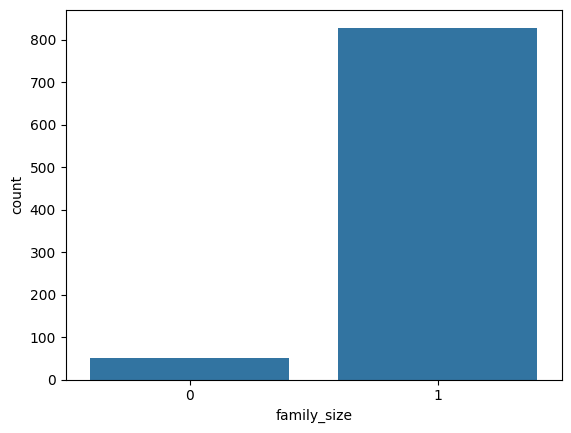

In [55]:
sns.countplot(x="family_size", data = train_df)
plt.show

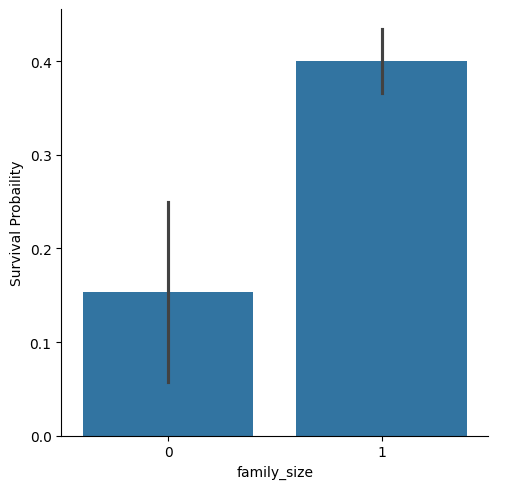

In [56]:
g = sns.catplot(x="family_size", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival Probaility")
plt.show()

In [57]:
train_df["Embarked"].head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object

<Axes: xlabel='Embarked', ylabel='count'>

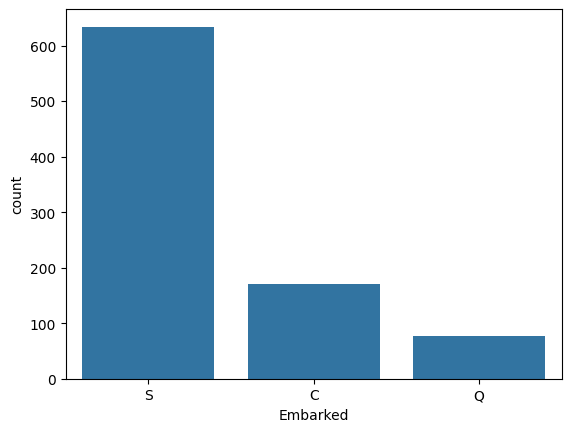

In [58]:
sns.countplot(x="Embarked", data=train_df)

In [59]:
train_df = pd.get_dummies(data=train_df, columns=["Embarked"], dtype=int)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,2,1,0,0,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,0,1,0,0,2,1,1,0,0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,0,0,1,1,0,0,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,0,1,0,0,2,1,0,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,1,0,0,1


In [60]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [61]:
a = train_df["Ticket"].iloc[12]
a

'A/5. 2151'

In [62]:
a = a.replace(".","").replace("/","").strip().split(" ")[0]

In [63]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".", "").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets

In [64]:
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [65]:
train_df = pd.get_dummies(train_df, columns=["Ticket"], prefix="T", dtype=int)
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,male,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,female,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,female,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,3,male,26.0,0,0,8.4583,NaN,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0,1,male,54.0,0,0,51.8625,E46,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0,3,male,2.0,3,1,21.0750,NaN,1,...,0,0,0,0,0,0,0,0,0,1
8,9,1,3,female,27.0,0,2,11.1333,NaN,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1,2,female,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1


In [66]:
train_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,male,22.0,1,0,7.2500,NaN,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1,1,female,38.0,1,0,71.2833,C85,0,...,0,0,0,0,0,0,0,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,NaN,0,...,0,0,0,0,0,1,0,0,0,0
3,4,1,1,female,35.0,1,0,53.1000,C123,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,0,...,0,0,0,0,0,0,0,0,0,1
5,6,0,3,male,26.0,0,0,8.4583,NaN,0,...,0,0,0,0,0,0,0,0,0,1
6,7,0,1,male,54.0,0,0,51.8625,E46,0,...,0,0,0,0,0,0,0,0,0,1
7,8,0,3,male,2.0,3,1,21.0750,NaN,1,...,0,0,0,0,0,0,0,0,0,1
8,9,1,3,female,27.0,0,2,11.1333,NaN,0,...,0,0,0,0,0,0,0,0,0,1
9,10,1,2,female,14.0,1,0,30.0708,NaN,0,...,0,0,0,0,0,0,0,0,0,1


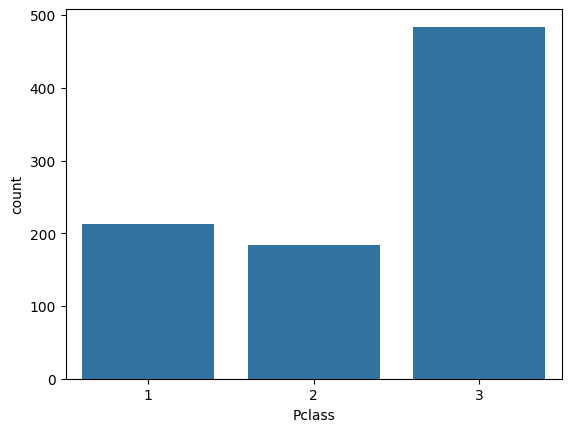

In [67]:
sns.countplot(x="Pclass", data=train_df)
plt.show()

In [68]:
train_df["Pclass"] = train_df["Pclass"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Pclass"], dtype=int)
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0,male,22.0,1,0,7.2500,NaN,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,female,38.0,1,0,71.2833,C85,0,1,...,0,0,0,0,0,0,0,1,0,0
2,3,1,female,26.0,0,0,7.9250,NaN,0,1,...,0,0,1,0,0,0,0,0,0,1
3,4,1,female,35.0,1,0,53.1000,C123,0,1,...,0,0,0,0,0,0,1,1,0,0
4,5,0,male,35.0,0,0,8.0500,NaN,0,0,...,0,0,0,0,0,0,1,0,0,1


In [69]:
train_df["Sex"] = train_df["Sex"].astype("category")
train_df = pd.get_dummies(train_df, columns=["Sex"], dtype=int)
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,NaN,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,2,1,38.0,1,0,71.2833,C85,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,3,1,26.0,0,0,7.9250,NaN,0,1,0,...,1,0,0,0,0,0,0,1,1,0
3,4,1,35.0,1,0,53.1000,C123,0,1,0,...,0,0,0,0,1,1,0,0,1,0
4,5,0,35.0,0,0,8.0500,NaN,0,0,1,...,0,0,0,0,1,0,0,1,0,1


In [70]:
train_df.drop(labels = ["PassengerId", "Cabin"], axis=1, inplace=True)

In [71]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 50 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     881 non-null    int64  
 1   Age          881 non-null    float64
 2   SibSp        881 non-null    int64  
 3   Parch        881 non-null    int64  
 4   Fare         881 non-null    float64
 5   Title_0      881 non-null    int64  
 6   Title_1      881 non-null    int64  
 7   Title_2      881 non-null    int64  
 8   Title_3      881 non-null    int64  
 9   Fsize        881 non-null    int64  
 10  family_size  881 non-null    int64  
 11  Embarked_C   881 non-null    int64  
 12  Embarked_Q   881 non-null    int64  
 13  Embarked_S   881 non-null    int64  
 14  T_A4         881 non-null    int64  
 15  T_A5         881 non-null    int64  
 16  T_AS         881 non-null    int64  
 17  T_C          881 non-null    int64  
 18  T_CA         881 non-null    int64  
 19  T_CASOTO

In [72]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [73]:
train = train_df[:train_df_len]

In [74]:
train

,Survived,Age,SibSp,Parch,Fare,Title_0,Title_1,Title_2,Title_3,Fsize,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,2,...,0,0,0,0,0,0,0,1,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,2,...,0,0,0,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,1,0,0,1,...,1,0,0,0,0,0,0,1,1,0
3,1,35.0,1,0,53.1000,0,1,0,0,2,...,0,0,0,0,1,1,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
876,0,27.0,0,0,13.0000,0,0,0,1,1,...,0,0,0,0,1,0,1,0,0,1
877,1,19.0,0,0,30.0000,0,1,0,0,1,...,0,0,0,0,1,1,0,0,1,0
878,0,13.5,1,2,23.4500,0,1,0,0,4,...,0,0,1,0,0,0,0,1,1,0
879,1,26.0,0,0,30.0000,0,0,1,0,1,...,0,0,0,0,1,1,0,0,0,1


In [75]:
X_train = train.drop(labels = "Survived", axis=1)
y_train = train["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size = 0.30, random_state=42
)


### Lets apply Simple Linear Regression

In [76]:
log_reg = LogisticRegression(max_iter = 1000)
log_reg.fit(X_train, y_train)

acc_train = round(log_reg.score(X_train, y_train)*100, 2)
acc_test = round(log_reg.score(X_test, y_test)*100, 2)

In [77]:
print(f"Training Accuracy = {acc_train}%")
print(f"Test Accuracy = {acc_test}%")

Training Accuracy = 83.12%
Test Accuracy = 81.13%


### Comparing the dataset with 
### 1. Decision Tree
### 2. Support Vector Machine (SVM)
### 3. Random Forest 
### 4. K-Nearest Neighbors (KNN)
### 5. Logistic Regression

In [90]:

classifier = [
    DecisionTreeClassifier(random_state=42),
    SVC(random_state = 42),
    RandomForestClassifier(random_state=42),
    LogisticRegression(random_state=42, max_iter=2000),
    KNeighborsClassifier()
]

dt_param_grids = {
    "min_samples_split" : range(10,500,20),
    "max_depth" : range(1,20,2)
}
svc_param_grid = {
    "kernel" : ["rbf"],
    "gamma" : [0.001, 0.01, 0.1, 1],
    "C" : [1,10,50,100,200,300,1000]
}
rf_param_grid = {
    "max_features": [1,3,10],
    "min_samples_split" : [2,3,10],
    "min_samples_leaf" : [1,3,10],
    "bootstrap" : [False],
    "n_estimators": [100,300],
    "criterion" : ["gini"]
}
log_reg_param_grid = [
    {"penalty" : ["l2"] , "solver" : ["lbfgs", "newton-cg", "sag", "saga"]
    , "max_iter" : [1000,2000]},
    {"penalty" : ["l1"] , "solver" : ["liblinear", "saga"]
    , "max_iter" : [1000,2000]}
]
knn_param_grid = {
    "n_neighbors" : np.linspace(1,19,10,dtype=int).tolist(),
    "weights" : ["uniform", "distance"],
    "metric" : ["euclidean" , "manhattan"]
}

classifier_param = [
    dt_param_grids,
    svc_param_grid,
    rf_param_grid,
    log_reg_param_grid,
    knn_param_grid
    
]

In [91]:
cv_results = []
best_estimators = []
for i in range(len(classifier)):
    clf= GridSearchCV(
      classifier[i],
        param_grid=classifier_param[i],
        cv=StratifiedKFold(n_splits=10),
        scoring="accuracy",
        n_jobs=-1,
        verbose=1  
    )
    clf.fit(X_train, y_train)
    cv_results.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_) 
    print(cv_results[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8408514013749337
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.796853516657853
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.842411422527763
Fitting 10 folds for each of 12 candidates, totalling 120 fits
0.8197778952934955
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7661554732945531


In [93]:
cv_results = pd.DataFrame({
    "Cross Validation Scores" : cv_results,
    "ML Models" : [
        "Decision Tree",
        "Support Vector Machine (SVM)",
        "Random Forest",
        "K-Nearest Neighbors (KNN)",
        "Logistic Regression"
    ]
})

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Decision Tree'),
  Text(1, 0, 'Support Vector Machine (SVM)'),
  Text(2, 0, 'Random Forest'),
  Text(3, 0, 'K-Nearest Neighbors (KNN)'),
  Text(4, 0, 'Logistic Regression')])

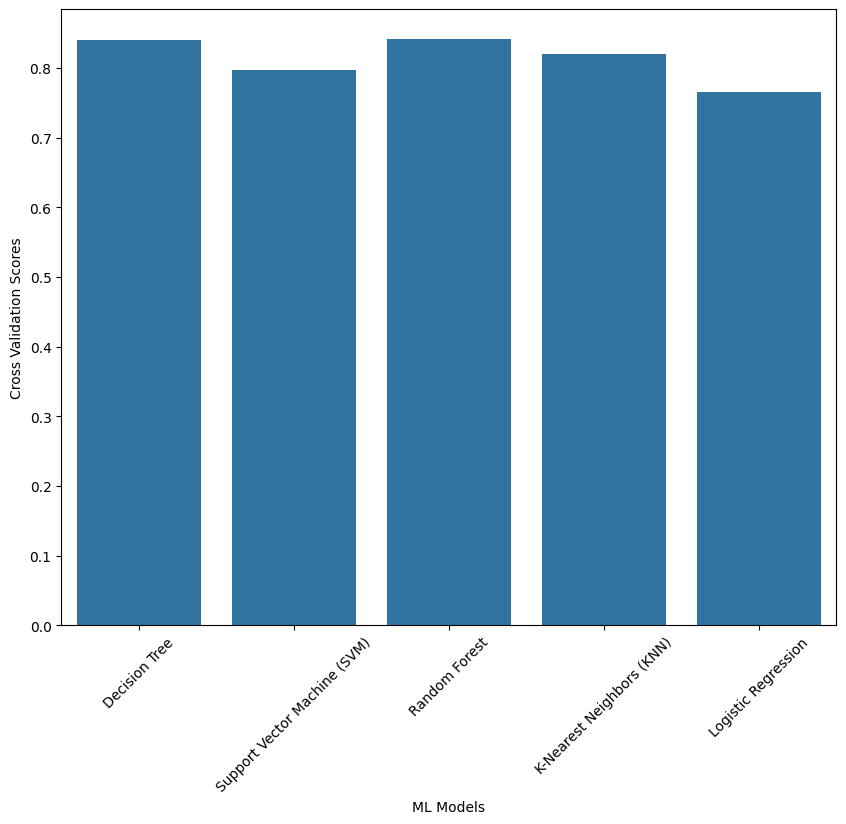

In [98]:
plt.figure(figsize=(10,8))
g = sns.barplot(cv_results, x="ML Models", y="Cross Validation Scores")
plt.xticks(rotation=45)